**Imports**

In [0]:
from keras.datasets import cifar10
from matplotlib import pyplot
%matplotlib inline
from scipy.misc import toimage
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [0]:
import os
from google.colab import drive
drive.mount('/content/cnn')
os.chdir('/content/cnn/My Drive/CNN_Tutorial/')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


**Dataset**



1.   A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research (CIFAR).
2.   The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance.
3.  The photos are in color with red, green and blue components, but are small measuring 32 by 32 pixel squares.









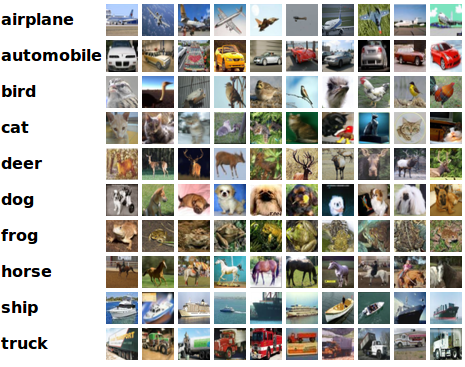

In [0]:
from IPython.display import Image,display
display(Image(filename='/content/cnn/My Drive/CNN_Tutorial/Test_Images/c.png',embed=True))

170500096/170498071 [==============================] - 34s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


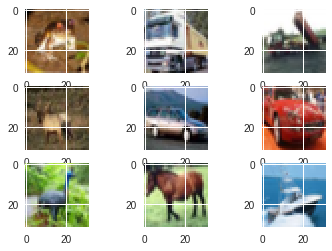

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
pyplot.show()

In [0]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

50000
50000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Pre-Processing**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

**AlexNet Model**

In [0]:
def AlexNet_model():
  
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    #model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    
    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(num_classes, activation='softmax'))
    
    lrate = 0.01
    epochs=25
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [0]:
model = AlexNet_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_2

**Keras Callbacks**

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/cipharAlexNetNet_batch_drop.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/cipharAlexNetNet_batch_drop.csv',append=True)

In [0]:
model.fit(X_train, y_train, validation_split=(0.2), epochs=25, batch_size=32,verbose=2,callbacks=[cv,mc,tb])

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/25
 - 22s - loss: 1.8192 - acc: 0.3668 - val_loss: 1.3617 - val_acc: 0.5006
Epoch 2/25
 - 21s - loss: 1.3089 - acc: 0.5345 - val_loss: 1.4625 - val_acc: 0.4853
Epoch 3/25
 - 21s - loss: 1.0845 - acc: 0.6163 - val_loss: 1.2882 - val_acc: 0.5493
Epoch 4/25
 - 20s - loss: 0.9503 - acc: 0.6661 - val_loss: 0.9107 - val_acc: 0.6804
Epoch 5/25
 - 20s - loss: 0.8499 - acc: 0.7010 - val_loss: 0.9050 - val_acc: 0.6846
Epoch 6/25
 - 21s - loss: 0.7704 - acc: 0.7293 - val_loss: 0.7739 - val_acc: 0.7314
Epoch 7/25
 - 21s - loss: 0.7043 - acc: 0.7544 - val_loss: 0.8750 - val_acc: 0.6960
Epoch 8/25
 - 21s - loss: 0.6394 - acc: 0.7737 - val_loss: 0.7932 - val_acc: 0.7253
Epoch 9/25
 - 21s - loss: 0.6049 - acc: 0.7882 - val_loss: 0.7540 - val_acc: 0.7389
Epoch 10/25
 - 21s - loss: 0.5566 - acc: 0.8060 - val_loss: 0.7685 - val_acc: 0.7352
Epoch 11/25
 - 21s - loss: 0.5148 - acc: 0.8192 - val_loss: 0

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.9906312622070312
Test accuracy: 0.735


**Saving and loading models**

In [0]:
#from keras.models import load_model
#model2 = model.save('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist1.h5')
#model2 = load_model("/content/cnn/My Drive/CNN_Tutorial/Models and CSV/mnist.h5")

**Prediction on Test Image **




2


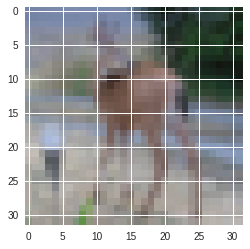

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 100
plt.imshow(X_test[image_index].reshape(32,32,3),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())

#### TensorBoard Visualization

In [0]:
#tensorboard --logdir=/home/student/Documents/ActiveNeuron/Keras/ALL_CSV_MODEL/logs
#tensorboard --logdir=/tmp  --port=8008

In [0]:
from google.colab import drive
drive.mount('/content/cnn')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


In [0]:
import cv2
import numpy as np
img1 = cv2.imread('/content/cnn/My Drive/CNN_Tutorial/Test_Images/h.jpeg')
img1 = np.resize(img1,(32,32,3))
img1 = img1/255
img1 = np.expand_dims(img1, axis=0)
print(img1.shape)

(1, 32, 32, 3)


**Intermediate Feature-map visualization**

In [0]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'batch_normalization_1', 'conv2d_2', 'max_pooling2d_2', 'batch_normalization_2', 'conv2d_3', 'max_pooling2d_3', 'batch_normalization_3', 'conv2d_4', 'max_pooling2d_4', 'batch_normalization_4', 'conv2d_5', 'max_pooling2d_5', 'batch_normalization_5', 'dropout_1', 'flatten_1', 'dense_1', 'dense_2', 'batch_normalization_6', 'dense_3']


In [0]:
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_3').output)
conv2d_4_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_4').output)
conv2d_5_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_5').output)

In [0]:
conv2d_1_features = conv2d_1_output.predict(img1)
conv2d_2_features = conv2d_2_output.predict(img1)
conv2d_3_features = conv2d_3_output.predict(img1)
conv2d_4_features = conv2d_4_output.predict(img1)
conv2d_5_features = conv2d_5_output.predict(img1)

print('First conv layer feature output shape : ',conv2d_1_features.shape)
print('First conv layer feature output shape : ',conv2d_2_features.shape)
print('First conv layer feature output shape : ',conv2d_3_features.shape)
print('First conv layer feature output shape : ',conv2d_4_features.shape)
print('First conv layer feature output shape : ',conv2d_5_features.shape)

First conv layer feature output shape :  (1, 32, 32, 32)
First conv layer feature output shape :  (1, 16, 16, 32)
First conv layer feature output shape :  (1, 8, 8, 64)
First conv layer feature output shape :  (1, 4, 4, 128)
First conv layer feature output shape :  (1, 2, 2, 128)


**Output Filters of First CNN block**

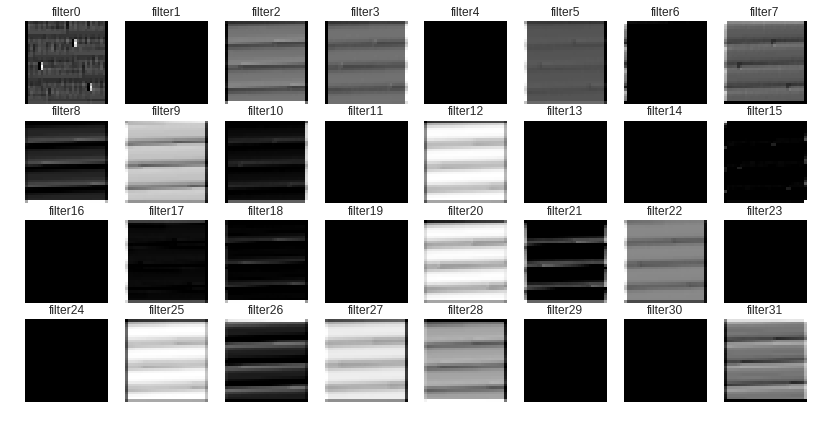

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

**Output Filters of Second CNN block**

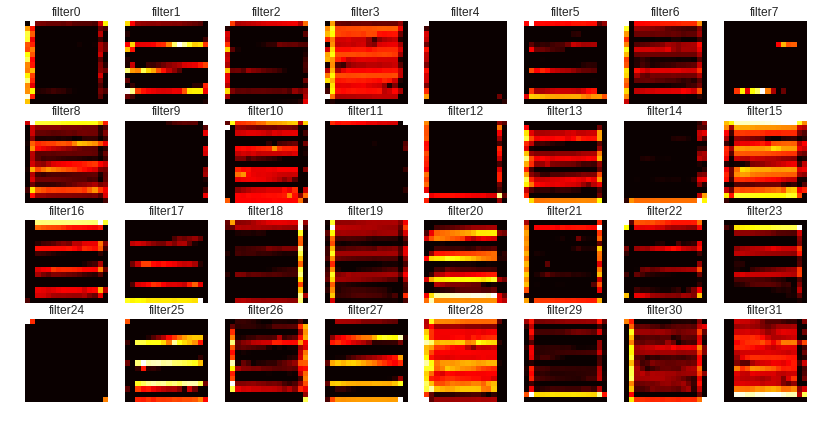

In [0]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='hot')
plt.show()

**Output Filters of Third CNN block**

<Figure size 720x720 with 0 Axes>

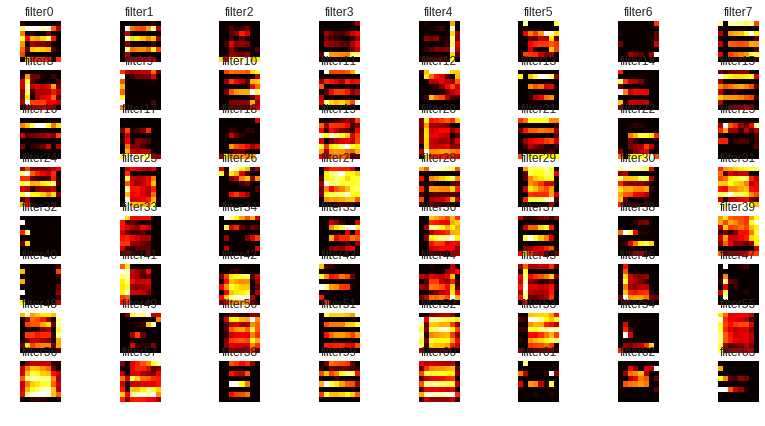

In [0]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='hot')
plt.show()

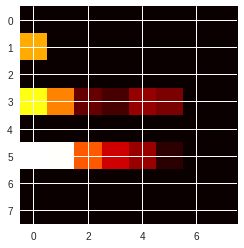

In [0]:
plt.imshow(conv2d_3_features[0, :, :, 63], cmap='hot')
plt.show()

**Output Filters of 4th CNN block**

<Figure size 720x720 with 0 Axes>

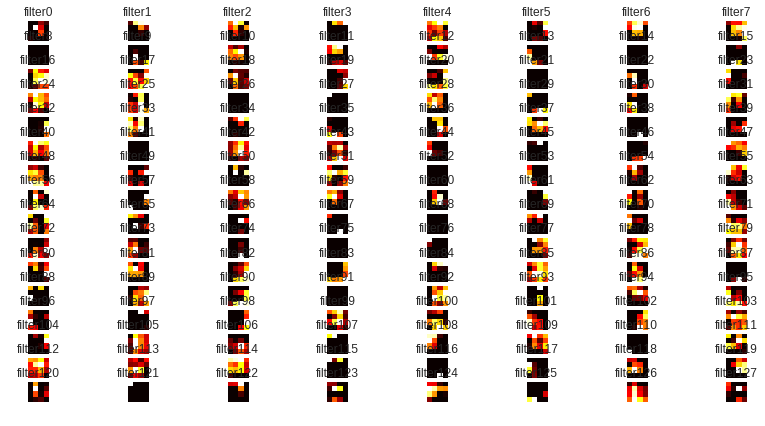

In [0]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 16
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_4_features[0, :, :, i], cmap='hot')
plt.show()

**Output Filters of 5th CNN block**

<Figure size 720x720 with 0 Axes>

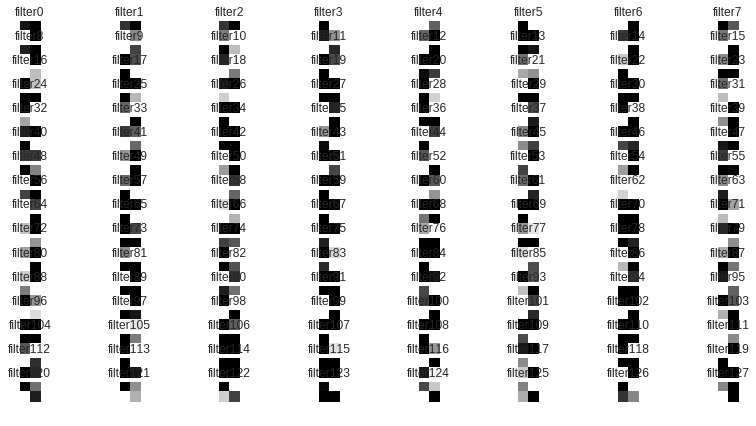

In [0]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 16
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_5_features[0, :, :, i], cmap='gray')
plt.show()

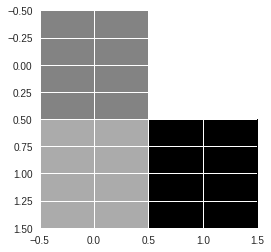

In [0]:
plt.imshow(conv2d_5_features[0, :, :, 125], cmap='gray')
plt.show()

**Confusion Matrix**

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.79      0.76      1000
     class 1       0.82      0.89      0.85      1000
     class 2       0.65      0.65      0.65      1000
     class 3       0.52      0.57      0.55      1000
     class 4       0.74      0.63      0.68      1000
     class 5       0.61      0.66      0.63      1000
     class 6       0.85      0.76      0.80      1000
     class 7       0.76      0.79      0.77      1000
     class 8       0.88      0.82      0.85      1000
     class 9       0.84      0.80      0.82      1000

   micro avg       0.73      0.73      0.73     10000
   macro avg       0.74      0.73      0.74     10000
weighted avg       0.74      0.73      0.74     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[785  21  49  33  15   7   5   6  55  24]
 [ 19 886   7   3   3   5   5   5  13  54]
 [ 75   6 645  72  58  58  41  33   3   9]
 [ 26   9  63 573  44 194  28  42   5  16]
 [ 24   3  83  75 631  52  39  75  12   6]
 [ 12   5  45 173  27 663   9  59   4   3]
 [  6   7  56  84  33  37 756  13   4   4]
 [ 23   6  30  47  31  60   2 788   3  10]
 [ 59  39  15  23   5   9   3   3 821  23]
 [ 32 100   5  16   3  10   4  15  13 802]]


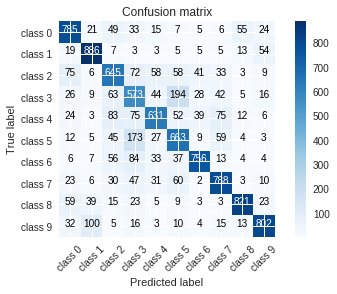

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,32,32,3))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)
print(activations[8].shape)
print(activations[9].shape)
print(activations[10].shape)
print(activations[11].shape)
print(activations[12].shape)
print(activations[13].shape)
print(activations[14].shape)
print(activations[15].shape)
print(activations[16].shape)
print(activations[17].shape)
print(activations[18].shape)
print(activations[19].shape)
print(activations[20].shape)

(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 64)
(1, 4, 4, 64)
(1, 4, 4, 64)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 128)
(1, 2, 2, 128)
(1, 1, 1, 128)
(1, 1, 1, 128)
(1, 1, 1, 128)
(1, 128)
(1, 1024)
(1, 512)
(1, 512)
(1, 10)
